# Houses Price Prediction Project

Project planning steps:
1. Understand the problem 
2. Explore, clear, and prepare the data
3. Select and transform variables
4. Build, test, evaluate, and optimize the model
5. Tell the story of the data 

__The problem to be solved__: create a Machine Learning model to predict the price of a house

Quais a perguntas de negócio a serem respondidas?
Qual o problema que queremos resolver?
Por que ele é importante?
Dada uma solução hipotética para esse problema, como isso afetaria a empresa?

## Exploratory Data Analysis

In this section, I've performed data analysis to better understand the data.

This dataset contains 79 explanatory variables. 
The file __data/data_description.txt__ contains the description of each variable.

In [1]:
# loading packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
%matplotlib inline

In [2]:
# Loading the datasets

train = pd.read_csv('data/train.csv')
test = pd.read_csv('data/test.csv')

train.head(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


As the first step, let's see the data type in each column of the dataset.

In [3]:
# General statistics
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

We can see that the dataset has 1460 rows and 81 columns with numerical and categorical data.

Before start to analyzing each attribute, let's check if there are columns with null values (_NaN_).

### Data Cleaning

In [4]:
train.isnull().sum().sort_values(ascending=False).head(20)

PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
FireplaceQu      690
LotFrontage      259
GarageCond        81
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
BsmtExposure      38
BsmtFinType2      38
BsmtFinType1      37
BsmtCond          37
BsmtQual          37
MasVnrArea         8
MasVnrType         8
Electrical         1
Utilities          0
dtype: int64

In the above code, we count the number of NaN values in each column, sort the result and show only the first 20 results.

We can see that the columns PoolQC, MiscFeature, Alley, Fence, FireplaceQu have a lot of NaN values.

These columns with a lot of missing data will not contribute to our machine learning model. So let's remove them from the data.

In [5]:
# Dropping columns
train.drop(columns=['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu'], inplace=True)
test.drop(columns=['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu'], inplace=True)

In [6]:
# List the current columns with NaN values
columns_nan = train.isnull().sum().sort_values(ascending=False)
columns_nan = columns_nan[columns_nan > 0]
columns_nan

LotFrontage     259
GarageFinish     81
GarageType       81
GarageCond       81
GarageQual       81
GarageYrBlt      81
BsmtExposure     38
BsmtFinType2     38
BsmtFinType1     37
BsmtCond         37
BsmtQual         37
MasVnrType        8
MasVnrArea        8
Electrical        1
dtype: int64

Let's check the remaining columns with NaN values and what we can do to clean these data.

In [7]:
train[columns_nan.index].head(10)

,LotFrontage,GarageFinish,GarageType,GarageCond,GarageQual,GarageYrBlt,BsmtExposure,BsmtFinType2,BsmtFinType1,BsmtCond,BsmtQual,MasVnrType,MasVnrArea,Electrical
0,65.0,RFn,Attchd,TA,TA,2003.0,No,Unf,GLQ,TA,Gd,BrkFace,196.0,SBrkr
1,80.0,RFn,Attchd,TA,TA,1976.0,Gd,Unf,ALQ,TA,Gd,None,0.0,SBrkr
2,68.0,RFn,Attchd,TA,TA,2001.0,Mn,Unf,GLQ,TA,Gd,BrkFace,162.0,SBrkr
3,60.0,Unf,Detchd,TA,TA,1998.0,No,Unf,ALQ,Gd,TA,None,0.0,SBrkr
4,84.0,RFn,Attchd,TA,TA,2000.0,Av,Unf,GLQ,TA,Gd,BrkFace,350.0,SBrkr
5,85.0,Unf,Attchd,TA,TA,1993.0,No,Unf,GLQ,TA,Gd,None,0.0,SBrkr
6,75.0,RFn,Attchd,TA,TA,2004.0,Av,Unf,GLQ,TA,Ex,Stone,186.0,SBrkr
7,NaN,RFn,Attchd,TA,TA,1973.0,Mn,BLQ,ALQ,TA,Gd,Stone,240.0,SBrkr
8,51.0,Unf,Detchd,TA,Fa,1931.0,No,Unf,Unf,TA,TA,None,0.0,FuseF
9,50.0,RFn,Attchd,TA,Gd,1939.0,No,Unf,GLQ,TA,TA,None,0.0,SBrkr


We have 3 numerical variables and 11 categorical variables.

First, we check the correlation with the numerical variables with the target variable (SalePrice):

In [8]:
c = list(columns_nan.index)
c.append('SalePrice')
train[c].corr()

,LotFrontage,GarageYrBlt,MasVnrArea,SalePrice
LotFrontage,1.000000,0.070250,0.193458,0.351799
GarageYrBlt,0.070250,1.000000,0.252691,0.486362
MasVnrArea,0.193458,0.252691,1.000000,0.477493
SalePrice,0.351799,0.486362,0.477493,1.000000


From above we can see that numerical variables have a weak correlation with SalePrice. 

This is a strong indication that these values will have small importance in model training.

As in the dataset we have a lot of variables and we need to reduce this amount to reduce model complexity, we'll remove these columns.

In [9]:
# Dropping columns
train.drop(columns=['LotFrontage', 'GarageYrBlt', 'MasVnrArea'], inplace=True)
test.drop(columns=['LotFrontage', 'GarageYrBlt', 'MasVnrArea'], inplace=True)

When checking the _GarageQual_ (categorical) variable values we find this:

In [10]:
train.GarageQual.value_counts()

TA    1311
Fa      48
Gd      14
Po       3
Ex       3
Name: GarageQual, dtype: int64

If we check the variable description we see this:

__GarageQual: Garage quality__

* _Ex Excellent_

* _Gd Good_

* _TA Typical/Average_

* _Fa Fair_

* _Po Poor_

* _NA No Garage_

It turns out that Pandas (Python module) incorrectly converted NA (no garage) values to NaN. This happened for all garage-related categorical variables (GarageQual, GarageType, GarageFinish, GarageCond) and for basement related variables (BsmtFinType2, BsmtExposure, BsmtQual, BsmtFinType1, BsmtCond). In order, to fix this, we just need to replace _NaN_ by _NA_.

In [11]:
# Replacing NaN by NA (no Garage or no Basement)
for c in ['GarageQual', 'GarageType', 'GarageFinish', 'GarageCond', 'BsmtFinType2', 'BsmtExposure', 'BsmtQual', 'BsmtFinType1', 'BsmtCond']:
    train[c].fillna('NA', inplace=True)
    test[c].fillna('NA', inplace=True)

In [12]:
# List the current columns with NaN values
columns_nan = train.isnull().sum().sort_values(ascending=False)
columns_nan = columns_nan[columns_nan > 0]
columns_nan

MasVnrType    8
Electrical    1
dtype: int64

The remaining columns columns with NaN values are MasVnrType (Masonry veneer type) and Electrical (electrical system).

MasVnrType has these possible values:
* _BrkCmn - Brick Common_
* _BrkFace - Brick Face_
* _CBlock - Cinder Block_
* _None - None_
* _Stone - Stone_

Just as it happened with GarageQual variable the Pandas incorrectly converted the value _None_ as _NaN_.

In [13]:
train.MasVnrType.fillna('None', inplace=True)
test.MasVnrType.fillna('None', inplace=True)

Finally, let's check the Electrical column:

In [14]:
train.Electrical.value_counts()

SBrkr    1334
FuseA      94
FuseF      27
FuseP       3
Mix         1
Name: Electrical, dtype: int64

For the Electrical variable, there is no _NA_ or _None_ possible value, so in that case, this is a true missing value.

As we have only one observation with _NaN_ value, we'll just replace it with the most common value (SBrkr).

In [15]:
train.Electrical.fillna('SBrkr', inplace=True)
test.Electrical.fillna('SBrkr', inplace=True)

In [16]:
# Checking if there are NaN values
train.isnull().values.any()

False

So, now our datasets are cleaned.

### Features Analysis and Selection

Feature Selection is the process of selecting the attributes that can make the predicted variable more accurate or eliminating those attributes that are irrelevant and can decrease the model accuracy and quality.

Now, let's analyze the numerical and categorical variables (features) and find the most important variables to create the Machine Learning model.

In [17]:
train.dtypes.value_counts()

object    38
int64     35
dtype: int64

From above we can see that there is 38 categorical variables and 35 numerical variables.

we will first discuss about Numeric feature selection. 

#### Numerical Features

We'll start with numerical variables.

Let's compute the correlation matrix of the numerical values 

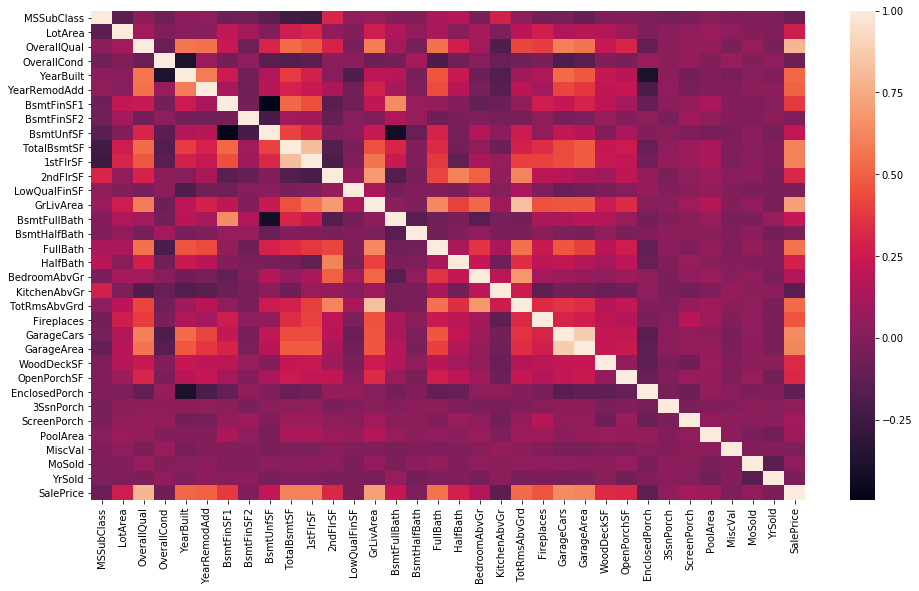

In [18]:
# Get only numerical columns
numerical_columns = list(train.dtypes[train.dtypes == 'int64'].index)
numerical_columns.remove('Id')

# plot the heatmap and annotation on it
plt.figure(figsize=(16, 9))
sns.heatmap(train[numerical_columns].corr(), xticklabels=numerical_columns, yticklabels=numerical_columns, annot=False);

As we have a lot of variables, is hard to analyze this figure.

Let's get the correlations related to the target variable (_SalePrice_).

As we are interested in the most correlated variables, let's filter to get only the variables with a correlation above 0.5 (positively correlated) or below -0.5 (negatively correlated).

In [19]:
# Get the SalePrice column of the correlation matrix 
correlations = train[numerical_columns].corr()['SalePrice'].sort_values()
# Filter the correlations
high_correlated_columns = correlations[(correlations > 0.5) | (correlations < -0.5)]
# Show the results
print(high_correlated_columns)
# Save the columns names in a list
high_correlated_columns = list(high_correlated_columns.index)
# Remove the SalePrice value from the list
high_correlated_columns.remove('SalePrice')

YearRemodAdd    0.507101
YearBuilt       0.522897
TotRmsAbvGrd    0.533723
FullBath        0.560664
1stFlrSF        0.605852
TotalBsmtSF     0.613581
GarageArea      0.623431
GarageCars      0.640409
GrLivArea       0.708624
OverallQual     0.790982
SalePrice       1.000000
Name: SalePrice, dtype: float64


We've selected 10 variables from this simple analysis.

If we check the data description file, we see that, actually, some numerical variables, are categorical variables that were saved (codified) as numbers.

Here is the description of _OverallQual_ variable:

_OverallQual: Rates the overall material and finish of the house_
* 10 Very Excellent
* 9 Excellent
* 8 Very Good
* 7 Good
* 6 Above Average
* 5 Average
* 4 Below Average
* 3 Fair
* 2 Poor
* 1 Very Poor

For now, we'll keep this selection as it is, but we need to keep this in mind if the machine learning model gets poor performance with the selected variables.

However this is not the end of the process. One of the assumptions of linear regression is that the independent variables need to be uncorrelated with each other. If these variables are correlated with each other, then we need to keep only one of them and drop the rest. So let us check the correlation of selected features with each other. This can be done either by visually checking it from the above correlation matrix 

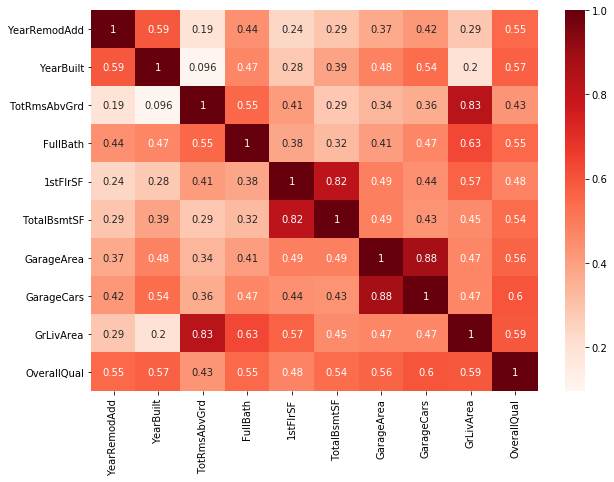

In [20]:
plt.figure(figsize=(10, 7))
sns.heatmap(train[high_correlated_columns].corr(), xticklabels=high_correlated_columns, yticklabels=high_correlated_columns, annot=True, cmap=plt.cm.Reds);

From the above image, it is seen some variables are highly correlated (> 0.6):
* **TotRmsAbvGrd** and **GrLivArea** --> 0.83
* **GarageArea** and **GarageCars** --> 0.88
* **1stFlrSF** and **TotalBsmtSF** --> 0.82
* **FullBath** and **GrLivArea** --> 0.63

Let's see what are information in these variables:
* **TotRmsAbvGrd**: Total rooms above grade (does not include bathrooms)
* **GrLivArea**: Above grade (ground) living area square feet
* **GarageCars**: Size of garage in car capacity
* **TotalBsmtSF**: Total square feet of basement area
* **1stFlrSF**: First Floor square feet
* **FullBath**: Full bathrooms above grade

Hence we would keep only one variable from each pair and drop the other. 

We will keep the variables with highest correlation with **SalePrice**.

Thus, we selected: _GrLivArea, GarageCars, TotalBsmtSF_ and remove the others.    

In [128]:
# Make a copy
selected_numerical_columns = high_correlated_columns[:]
# Remove variables
selected_numerical_columns.remove('TotRmsAbvGrd')
selected_numerical_columns.remove('GarageArea')
selected_numerical_columns.remove('1stFlrSF')
selected_numerical_columns.remove('FullBath')

# Show selected columns
selected_numerical_columns

['YearRemodAdd',
 'YearBuilt',
 'TotalBsmtSF',
 'GarageCars',
 'GrLivArea',
 'OverallQual']

#### Categorical Features

Now, let's check the categorical variables.

In [130]:
# Get only categorical columns
categ_columns = list(train.dtypes[train.dtypes == 'object'].index)

# Show some data
train[categ_columns].head()

,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,...,Electrical,KitchenQual,Functional,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
0,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,...,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
1,RL,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,...,SBrkr,TA,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
2,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,...,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
3,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,...,SBrkr,Gd,Typ,Detchd,Unf,TA,TA,Y,WD,Abnorml
4,RL,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,...,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal


Let's see if there is some null values (NaN) in the categorical 

https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data

https://www.datacamp.com/community/tutorials/categorical-data

https://www.kaggle.com/avelinocaio/house-prices-complete-guide